<a href="https://colab.research.google.com/github/vidyashankarappa/MLCode/blob/main/MachineLearning_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries only
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.metrics import mean_absolute_error

import shap
shap.initjs()
from sklearn.datasets import make_regression

In [ ]:
wine = pd.read_csv("WineQT.csv")


In [ ]:
wine.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


#PCA

<Figure size 600x500 with 0 Axes>

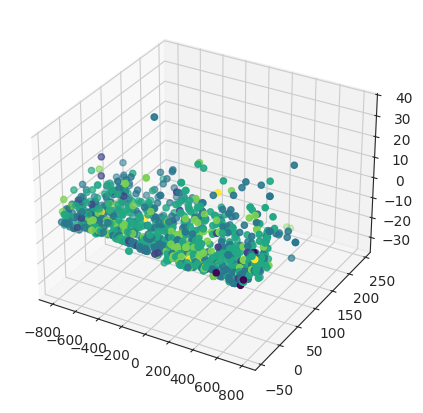

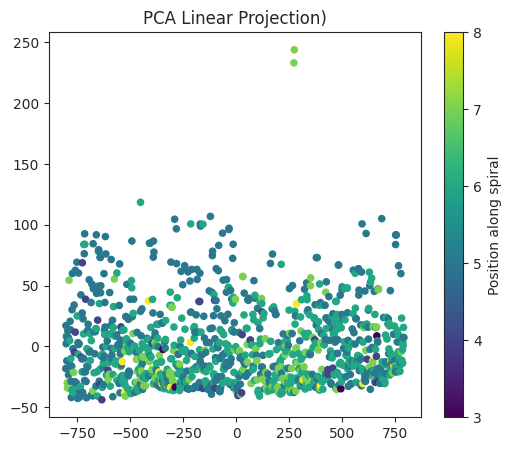

In [ ]:
X = wine.drop('quality', axis=1)  # Assuming 'quality' is your target variable
y = wine['quality']

# Standardize and apply PCA
# apply PCA function..
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)

# Plot PCA results

plt.figure(figsize=(6, 5))
# Use y instead of t to color the scatter plot
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=20) # This line is creating a 2D scatter plot, not 3D
# To create a 3D scatter plot with PCA results, you would need 3 components:

# Assuming you want a 3D plot for PCA results, change n_components to 3
#pca_3d = PCA(n_components=3)
#X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', s=20)
plt.show()

# Plot PCA results
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=20)
plt.title("PCA Linear Projection)")
plt.colorbar(label='Position along spiral')
plt.show()


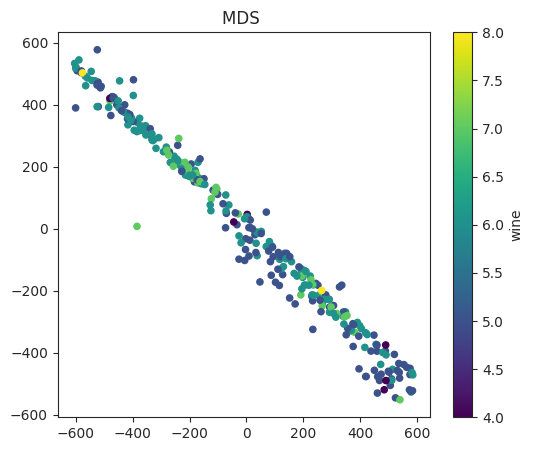

In [ ]:
# Apply MDS (subset for speed)
# Apply MDS (subset for speed)
np.random.seed(42)
subset = np.random.choice(len(X), 300, replace=False)

# Use .iloc to select rows by their index
X_sub, y_sub = X.iloc[subset], y.iloc[subset]

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_sub)

# plot MDS results
plt.figure(figsize=(6, 5))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_sub, cmap='viridis', s=20)
plt.title("MDS ")
plt.colorbar(label='wine')
plt.show()

#ISOMap

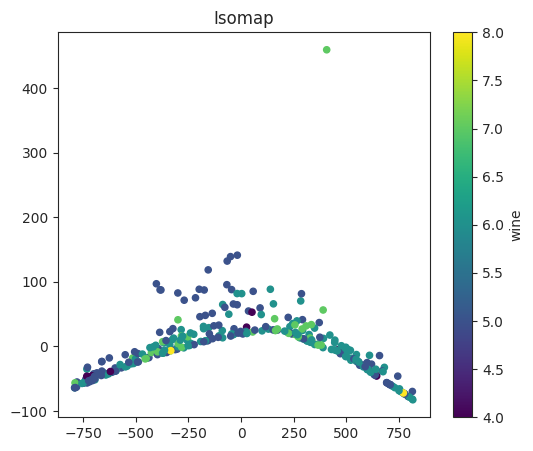

In [ ]:
# Apply Isomap
isomap = Isomap(n_components=12, n_neighbors=15)
X_iso = isomap.fit_transform(X_sub)


# Plot Isomap results
plt.figure(figsize=(6, 5))
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_sub, cmap='viridis', s=20)
plt.title("Isomap")
plt.colorbar(label='wine')
plt.show()

#t-SINE

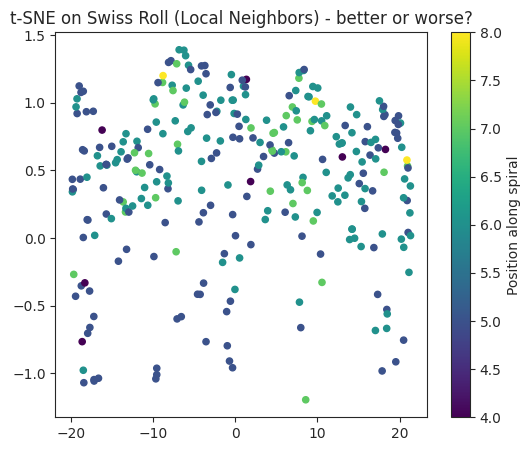

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components= 3, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sub)

# plotting t-SNE results
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sub, cmap='viridis', s=20)
plt.title("t-SNE on Swiss Roll (Local Neighbors) - better or worse?")
plt.colorbar(label='Position along spiral')
plt.show()

side by side

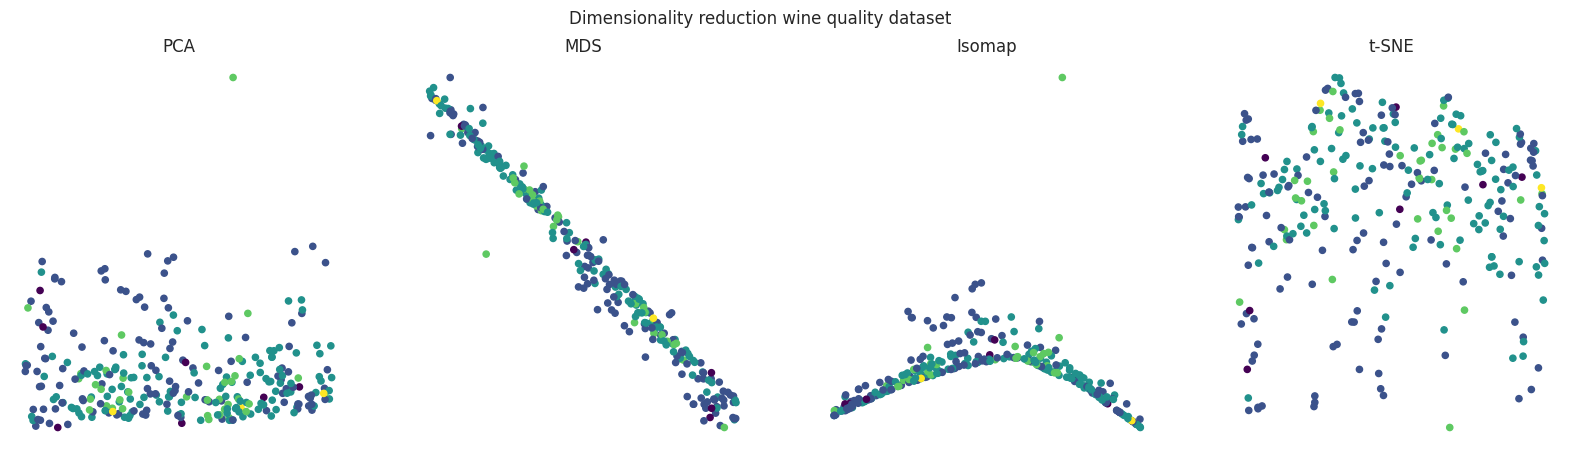

In [ ]:
# Plot all methods
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
titles = ['PCA', 'MDS', 'Isomap', 't-SNE']
embeddings = [X_pca[subset], X_mds, X_iso, X_tsne]

for i in range(4):
    ax[i].scatter(embeddings[i][:, 0], embeddings[i][:, 1], c=y_sub, cmap='viridis', s=20)
    ax[i].set_title(titles[i])
    ax[i].axis('off')  # Hide axes for clarity
plt.suptitle("Dimensionality reduction wine quality dataset")
plt.show()